<a href="https://colab.research.google.com/github/PremGorecki/MachineLearning/blob/main/PAWEL_17_october_Temat1_Przygotowanie_Danych_Regresja_Liniowa_pomaranczowi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

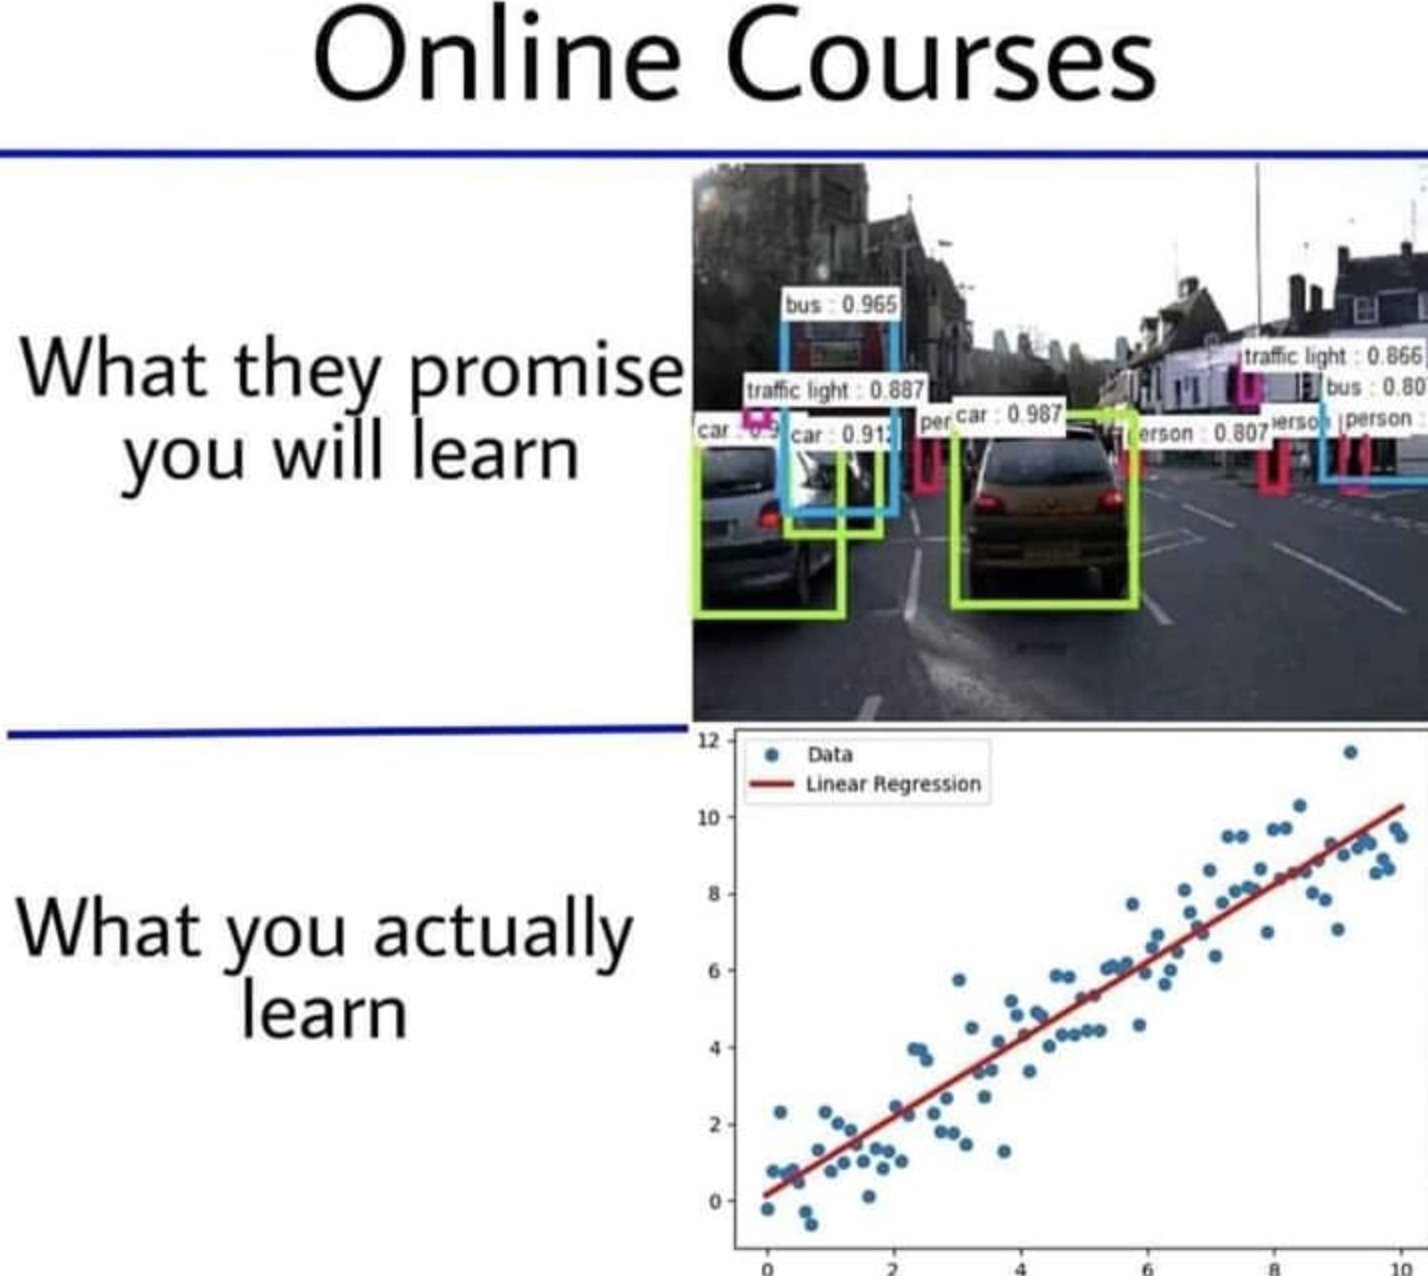

# Temat1 Wstep do Uczenia Maszynowego

Uwaga, szkolenie nie pretenduje do miana kursu akademickiego i ma na celu wyrobienie pewnego pojęcia czym jest Uczenie maszynowe i jakie problemy rozwiązuje. Będzie możliwie jak najmniej matematyki, przepraszam z góry zwariowanych wariatów na punkcie matematyki. Niestety bardziej matematyczne szkolenia nie cieszą się szczególnym zainteresowaniem. 

Uczenie maszynowe, nieformalnie mówiąc, to zbiór algorytmów, które na podstawie zbioru uczącego(często oznaczanego literą **X**, rozwiązują pewnego rodzaju problemy(prognozują pewne wartości). Te wartości często oznaczamy literą **y**. 


Obrazowo rzecz biorąc, szukamy takiego algorytmu(oznaczmy go nazwą funkcja **f**), która przekształci zbiór uczący **X** w taki sposób, że f(X) bedzie się równać **y** w każdym z jego punktów.

<img src="https://miro.medium.com/max/1400/1*0mF84kBsZTE5_5CkTfxORQ.png" width=1000 height=800 />

Przykład idealnego dopasowania, raczej niespotykany w przyrodzie, oprócz oczywistych przypadków 100% procentowej korelacji, takich jak opieprz po piwku z kumplami od żony, czy liczba walk a liczba przegranych Najmana.

Zródło obrazka:
https://medium.com/@tarlanahad/kickass-introduction-to-regressions-linear-regression-with-python-41d9ac86f267

<img src="https://miro.medium.com/max/1400/1*hy2kpU-2VcpQgAQkVhlWYA.png" width=1000 height=800 />

Przykład realnego dopasowania, jest wysoka korelacja, natomiast funkcja **f**(linia czerwona) nie zamienia idealnie **X**(zbioru uczącego) na zmienna **y**

Zródło:
https://medium.com/@tarlanahad/kickass-introduction-to-regressions-linear-regression-with-python-41d9ac86f267

Zanim przejdziemy dalej, warto wspomnieć o pewnej kwestii. Na wyżej ukazanych rysunkach zależność zmiennej **X** oraz **y** jest wysoka i sugeruja korelacje(wzrost czy spadek jednej ze zmiennej wplywa analogicznie na druga). To by sugerowało, że zawsze dwie zmienne mają ze sobą związek. Pokaże przykłady gdzie tak nie jest.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1920px-Anscombe%27s_quartet_3.svg.png" width=1000 height=800 />






Wszystkie z wykresów, mimo że kompletnie inaczej prezentuja się na wykresach, mają takie same statystyki opisowe. Na tym etapie dla nas najważniejszy Współczynnik determinacji R2, który jest równy 0.67. Co zaskakuje, bo wykresy nie sugerują tego że ten współczynnik jest ten sam. 

Więcej o tym zbiorze można poczytać tutaj:
https://en.wikipedia.org/wiki/Anscombe%27s_quartet








Tu troche mniej pasujacy do danych przyklad, ale dobrze ilutrustrujacy zasade fakt,

<img src="https://www.statology.org/wp-content/uploads/2021/08/corrCause5-768x556.png" width=1000 height=1000 />


Źródło:
https://www.statology.org/correlation-does-not-imply-causation-examples/

Wspominam o tym, by nie ulec iluzji, że wystarczy wrzucić dane do modelu i magicznie wszystko się wyliczy za nas. Trzeba mieć kontrolę nad danymi i nad całym procesem.

In [ ]:
# !wget -O ml1.png https://raw.githubusercontent.com/fuwiak/Uczenie_maszynowe_w_Pythonie_czerwiec/main/ml1.png

In [ ]:
# from IPython.display import Image


## Typy uczenia maszynowego



In [ ]:
# Image('/content/ml1.png', width=800, height=600)



# Źródło: https://miroslawmamczur.pl/czym-jest-uczenie-maszynowe-i-jakie-sa-rodzaje/

## Przerwa?

# Regresja liniowa

Trochę matematyki, żeby nie było całkiem idziemy na przypał z tematem.




Szczególnym, najprostszym przypadkiem regresji jest regresja liniowa, a więc dopasowanie liniowego modelu do danych. Model ma postać $ y = f(x) = ax + b $.

Funkcjonał $G$ przyjmuje wtedy postać:

$$ G(a,b) = \sum_{i=1}^N (y_i - f(x_i))^2. $$

$$ G(a,b) = \sum_{i=1}^N (y_i - ax_i - b)^2. $$



Brzmi **mądrze**, ale co właściwie co chcemy osiągnąć? My chcemy, żeby fukcjonał był jak najmniejszy. Ale czemu ma tak być?
Na samym początku szkolenia była mowa o tym, że celem uczenia maszynowego jest znalezienie takiej funkcji $f(x)$, która możliwie blisko przybliża nas do $y$. Fukcjonal pokazuje nam róźnicę między $f(x)$ a $y$, zależy nam żeby ta róznica była jak **najmniejsza**(czemu? bo skoro mają mieć tą samą wartość, to róźnica między dwoma takimi samymi wartościami jest równa 0). 

Hola, hola kapitanie, ale tu jest kwadrat róznicy, po co on tam jest? Przyczyny są conajmniej dwie. Jeśli byśmy nie brali kwadratu, to róznice y oraz f(x) będą czasami dajmy na to -2, 2, 3,4, -7. Nie podnosząc ich do kwadratu i sumując na koncu, dostaniemy wartosc funkcjonalu równą zero!(mimo ze widzimy ze zadane roznice sa duze).

Drugi fakt tłumaczy się wiedzą z analizy matematycznej na I semestrze studiów(mam nadzieję że każdy chodził na wykłady!). Jeśli chcemy zminimalizować zadaną funkcję, trzeba policzyć pierwszą pochodną i zbadać znak drugiej pochodnej( dla minimum ma byc dodatni). Tak się dziwnie składa, że druga pochodnna z funkcji liniowej jest równa zero, przez co nigdy byśmy nie określili czy dany punkt jest minimum czy maksimum funkcji tzw punkt siodlowy. Generalnie dupa zbita. Z pierwszą podchodną nie jest lepiej(czemu?). A my doskonale wiemy, że ta fukcja musi mieć minumum lokalne. Reasumując, ten kwadrat ratuje nam sprawę.

Pytanie do audytorii: czemu wartość bezwzględna też jest problematyczna?









In [ ]:
#tutaj reszta rachunków dla ciekawych, generalnie minimalizujemy funkcjonał i od tego wyprowadzamy sobie analitycznie wzory na a, b oraz niepewnosci pomiarowe tych wspolczyniikow.

Wyznaczamy pochodne cząstkowe funkcjonału $G(a,b)$ po parametrach $a$ i $b$, a następnie przyrównujemy je do zera

$$ \frac{\delta G}{\delta a} = - 2 \sum_{i=1}^N x_i(y_i - ax_i - b) = 0$$
$$ \frac{\delta G}{\delta b} = - 2 \sum_{i=1}^N (y_i - ax_i - b) = 0$$

i w wyniku otrzymujemy układ dwóch równań na dwie niewiadome. Rozwiązując go, wyznaczamy wartości parametrów $a$ i $b$ najlepiej pasujących do naszego modelu:

$$ a = \frac{N\sum_{i=1}^N x_iy_i - \left( \sum_{i=1}^N x_i \right) \left( \sum_{i=1}^N y_i \right) }{N \sum_{i=1}^{N} x_i^2 - \left( \sum_{i=1}^N x_i \right)^2}$$

$$ b = \frac{\left( \sum_{i=1}^N x_i^2\right) \left( \sum_{i=1}^N y_i \right) - \left( \sum_{i=1}^N x_i\right) \left( \sum_{i=1}^{N} x_i y_i\right)}{ N\sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2} $$

$S_y^2$ będzie w tym przypadku wyrażone wzorem: $S_y^2 = \frac{1}{N-2} \sum_{i=1}^N \left( y_i - ax_i - b \right)^2 $ . Dodatkowo, dla uproszczenia dalszych zapisów przyjąć można oznaczenie $ d_i = y_i - ax_i - b $. Wyznaczamy dwa parametry, więc liczba stopni swobody w tym przypadku wynosi $2$.

Odchylenia standardowe wyznaczonych parametrów $a$ i $b$ dopasowania są więc następujące:

$$ S_a^2 = \frac{ N \sum_{i=1}^N d_i^2}{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

$$ S_b^2 = \frac{ N \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i^2 \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

Kowariancję dopasowanych parametrów $a$ i $b$ wyrażamy jako:

$$ C_{a,b} = - \frac{ \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right] } $$

Ostateczne niepewności dopasowanej prostej wyznacza się jako odcylenia standarowe $\hat{x}$ i $\hat{y}$, gdzie $\hat{x} = \frac{y-b}{a}$ i $\hat{y}=ax + b$.

$$ S_{\hat{y}}^2 = x^2S_a^2 + S_b^2 + 2xC_{a,b}$$
$$ S_{\hat{x}}^2 = \left( \frac{y-b}{a^2} \right) ^2 S_a^2 + \left( \frac{1}{a} \right) ^2 S_b^2 + 2 \frac{y-b}{a^2} \frac{1}{a} C_{a,b} $$

Wartości te służą do oznaczenia przedziału ufności dopasowania i mogą zostać wykorzystane do graficznego przedstawienia niepewności dopasowania na wykresie.




## Przyklad funkcji liniowej na syntetycznych danych

Text(0, 0.5, 'Y')

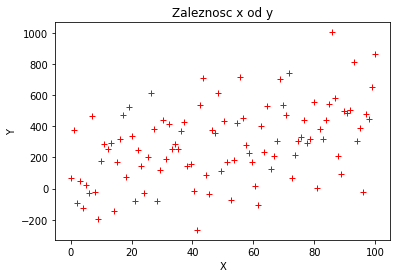

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


#wygerujmy sobie dane


x = np.linspace(0, 100, 100) # start=0, end=100, steps=1000
a = ( np.random.rand() - 0.5 ) * 20  #(-0.5 do 0.5) *20 = -10 do 10        
b = ( np.random.rand() - 0.5) * 2* math.pi   #(-0.5 do 0.5) *2*pi

y = a*x+b + np.random.normal(50, 200, 100)    
# print(x)
# print(y)

plt.plot(x, y, 'r+')
plt.title("Zaleznosc x od y")
plt.xlabel("X")
plt.ylabel("Y")


In [ ]:
b

-2.774544368541334

In [ ]:
 np.random.rand() #0 do 1

0.7600989186783083

In [ ]:
x.shape

(100,)

In [ ]:
y.shape #bezmymarowosc mozna tluamczyc mniej wiecej tak: w wroku mamy 100 ziemniakow rozrucone w kazdym kierunku, w naszych przypadku
#chcemy miec ziemniaki ulozone w jednej linii

(100,)

In [ ]:
#niestety dane nie maja wymiarow, zeby ich uzyc, musimy im je nadac

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# x = x.reshape(-1,4)

In [ ]:
x.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

Uwaga, wiekopomna chwila, dla wielu to może być pierwszy raz!

In [ ]:
model1 = LinearRegression() #stworzenie pustego modelu
model1 = model1.fit(x,y) #to jest same mieso!


In [ ]:
model1.coef_[0][0]

3.743335952256547

In [ ]:
help(model1)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [ ]:
dir(model1)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
a = round(model1.coef_[0][0],2)
b = round(model1.intercept_[0], 2)


print(f"Nachylenie prostej a={a}")
print(f"punkt przeciecia z osia x b={b}") 

Nachylenie prostej a=3.74
punkt przeciecia z osia x b=102.26


Text(0, 0.5, 'bmi')

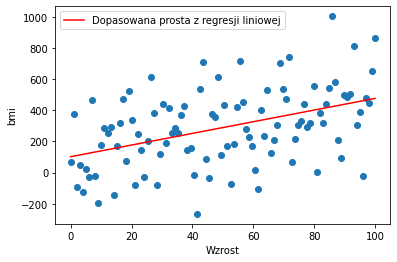

In [ ]:
plt.scatter(x,y)
plt.plot(x,model1.coef_[0][0]*x+model1.intercept_[0], 'r-', label='Dopasowana prosta z regresji liniowej')
plt.legend()

plt.xlabel("Wzrost")
plt.ylabel("bmi")

In [ ]:
#metryki 

R2 = model1.score(x,y)
R = np.sqrt(R2)
print(f"R2={R2}")
print(f"R={R}")


R2=0.1936392132280632
R=0.44004455823025834


### numpy.polyfit - niepewność dopasowania


Mamy możliwość zwrócenia macierzy kowariancji parametrów z wykonanego dopasowania(uwaga, stuczka, dla spragnionych wyjasnienia dokladniej matematycznego odsyłam [tu ](https://www.mimuw.edu.pl/~msobol/wykl/diagonal1.pdf) i [tu](https://en.wikipedia.org/wiki/Covariance_matrix)

Odchylenia standardowe parametrów $a$ i $b$ dopasowania to pierwiastek ze zdiagonalizowanej macierzy kowariancji:

$$ S = \sqrt{diag(cov)} $$

In [ ]:
fit, cov = np.polyfit(np.squeeze(x), np.squeeze(y), 1, cov=True)  # dopasowujemy wielomian 1-go stopnia i żądamy zwrócenia macierzy kowariancji
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

uncertainty = np.sqrt(np.diag(cov))

print( "Wartość parametru a = %d" % fitted_a )
print( "Niepewność parametru a = %d" % uncertainty[0] )
print( "Wartość parametru b = %d" % fitted_b )
print( "Niepewność parametru b  = %d" % uncertainty[1] )

[  3.74333595 102.26407249]
Wartość parametru a = 3
Niepewność parametru a = 0
Wartość parametru b = 102
Niepewność parametru b  = 44


In [ ]:
#drugi sposób

In [ ]:
import statsmodels.api as sm 

x = sm.add_constant(x) # adding a constant

model2 = sm.OLS(y, x).fit() 
model2.params # linear coefficients

array([102.26407249,   3.74333595])

Nieuwzględnienie stałej w modelu regresji powoduje, że stała jest równa zeru. Takie działanie zmusza linię regresji do przejścia przez początek. Innymi słowy, model, w którym nie uwzględniono stałej, wymaga, aby wszystkie zmienne niezależne i zmienna zależna były jednocześnie równe zeru. Co zazwyczaj nie jest prawdą.

In [ ]:
model2.bse # standard errors of the parameter estimates

array([44.66292157,  0.77163837])

In [ ]:
model2.summary() # alfa = 0.05, 0.01, 0.001
# p-value = {}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     23.53
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.63e-06
Time:                        10:10:09   Log-Likelihood:                -682.49
No. Observations:                 100   AIC:                             1369.
Df Residuals:                      98   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.2641     44.663      2.290      0.024      13.632     190.896
x1             3.7433      0.772      4.851      0.000       2.212       5.275
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.459
Skew:                           0.073   Prob(JB):                        0.795
Kurtosis:                       2.702   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
LRresult = (model2.summary2().tables[1])

In [ ]:
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,102.264072,44.662922,2.289686,0.024184,13.631958,190.896187
x1,3.743336,0.771638,4.851153,0.000005,2.212045,5.274627


In [ ]:
LRresult.columns

Index(['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]'], dtype='object')

In [ ]:
pvalue_from_results = LRresult['P>|t|']
# print(pvalue_from_results)

p_value_b = pvalue_from_results.iloc[0]
p_value_a = pvalue_from_results.iloc[1]

In [ ]:
alfa = 0.05
if p_value_b>alfa:
  print("niestotnosc statystyczna")
else:
  print("istotnosc statystyczna")

istotnosc statystyczna


In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     23.53
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.63e-06
Time:                        10:10:10   Log-Likelihood:                -682.49
No. Observations:                 100   AIC:                             1369.
Df Residuals:                      98   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.2641     44.663      2.290      0.0

In [ ]:
#inne sposoby dopasowania prostej

[-8.93717818 86.38500986]


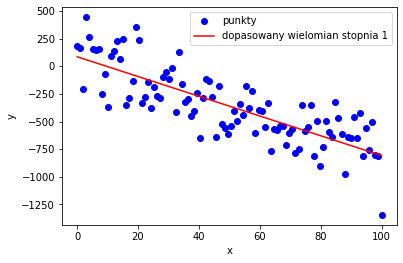

In [ ]:
x = np.linspace(0, 100, 100)
a = ( np.random.rand() - 0.5 ) * 20         
b = ( np.random.rand() - 0.5) * 2* math.pi   

y = a*x+b + np.random.normal(50, 200, 100)    



fit = np.polyfit(x, y, 1)  # dopasowujemy wielomian 1-go stopnia
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

fitted_y = fitted_a * x + fitted_b

plt.plot(x, y, "bo", x, fitted_y, "r-")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["punkty", "dopasowany wielomian stopnia 1"])

Średnia z residuuów: 0


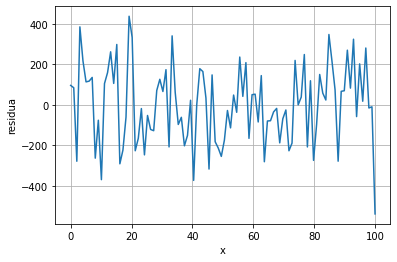

In [ ]:
#sprawdzy róźnicę między przewidywanianiami a danymu

residuals = y - fitted_y
print("Średnia z residuuów: %d" % (np.mean(residuals))) # tak byc powinno, piekny wynik

plt.plot(x, residuals)
plt.xlabel('x')
plt.ylabel("residua")
plt.grid(True)

### scipy - dopasowanie krzywej wraz z niepewnościami


Wartość parametru a = -8
Niepewność parametru a = 0
Wartość parametru b = 86
Niepewność parametru b  = 38


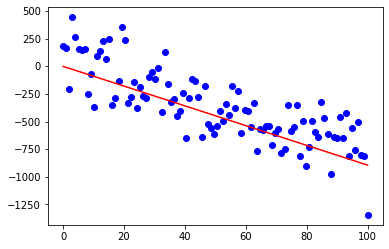

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x + b

fit_sp, cov_sp = curve_fit(f, x, y)

a_fit = fit_sp[0]
b_fit = fit_sp[1]

uncertainty_sp = np.sqrt(np.diag(cov_sp))

print( "Wartość parametru a = %d" % a_fit )
print( "Niepewność parametru a = %d" % uncertainty_sp[0] )
print( "Wartość parametru b = %d" % b_fit )
print( "Niepewność parametru b  = %d" % uncertainty_sp[1] )

plt.plot(x, y, 'bo', x, a_fit*x+b, 'r-')

# Przykład postępowania dla regresji liniowej na bardziej praktycznym przykladzie

W tej części czekają nas następujące kroki:
- wczytanie i obejrzenie danych
- sprawdzenie czy istnieją i ewentualne uzupełnienie braków danych
- dygresja na temat technik uzupełniania braków danych
- podstawowe wizualizacje zmiennych
- przygotowania i selekcja zmiennych do regresji
- ewaluacja modelu wg najlepszych znanych technik
- ewentualna próba poprawy dopasowania



Przewidywanie ceny domów. Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach. Dokładny opis danych: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/data Zmienna celu (cena domu): SalePrice


In [ ]:
!wget -O ames2000_NAfix.csv https://raw.githubusercontent.com/fuwiak/Uczenie_maszynowe_w_Pythonie_czerwiec/main/train.csv

--2022-10-18 10:10:10--  https://raw.githubusercontent.com/fuwiak/Uczenie_maszynowe_w_Pythonie_czerwiec/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘ames2000_NAfix.csv’

ames2000_NAfix.csv  100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2022-10-18 10:10:11 (12.5 MB/s) - ‘ames2000_NAfix.csv’ saved [460676/460676]



In [ ]:
path = "/content/ames2000_NAfix.csv"

### Pobranie i prezentacja zbioru

In [ ]:

data = pd.read_csv(path, sep=",")

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Podstawowa statystyka dotycząca danych

In [ ]:
pd.set_option('display.max_rows', len(data))


In [ ]:
data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
data.describe(include='all').T  # podsumowanie statystyk w formie czytelnej tabeli

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Pobranie danych i podstawowa charakterystyka

In [ ]:
#liczba kolumn
len(data.columns)

81

In [ ]:
#liczba wierszy
len(data)

1460

In [ ]:
#liczba brakow w columns
temp=data.isnull().sum()
temp = pd.DataFrame(temp)
mapping = {temp.columns[0]:'Count'}
temp = temp.rename(columns=mapping)
temp.style.set_properties(subset=['Count'], **{'width': '300px'})

,Count
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [ ]:
# w rozkladzie procentowym
temp["procent_brakow"]=(temp["Count"]/len(data))*100
temp['procent_brakow'].to_frame().style.set_properties(subset=['procent_brakow'], **{'width': '300px'})


,procent_brakow
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


Zadnanko bojowe

In [ ]:
#dla tabeli movies, sprawdzic jaki procent kazdej z kolumn stanowia braki

In [ ]:
ratings = [['Jan',5,np.NaN,2,1],['Maria',np.NaN,5,3,2],['Robert',4,4,np.NaN,3],['Ela',2,np.NaN,np.NaN,5],['Stanisław',1,2,3,4],['Adam',2,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
# movies.dropna(how="any", axis=1, thresh=5)

# Dygresja na temat uzupełnianiania braków

Warto tu na chwilę się zatrzymać, to ważny krok, a de facto regresję zrobiliśmy na danych syntetycznych, więc nie musimy się spieszyć.

Uzupełnianie braków w kolumnach wg określonej strategii:
- mean - uzupełnianie braków za pomocą średniej, stosuje się tylko dla danych ilościowych
- mode - uzupełnianie braków za pomocą mody, raczej dla wartości dyskretnych, można stosować dla danych kategorycznych
- 0 - uzupełnianie braków za pomocą 0, stosuje się w przypadku, gdzie wartość 0 ma jasną interpretację.
- specific value - uzywamy w przypadku gdy chcemy użyć jakieś customowej wartości, np 33 lub dwa, ważne żeby wartość była tego samego typu co uzupełniania kolumna.
- next_row, previous_row
  

In [ ]:
# df.fillna(method="backfill", inplace=True) # previous row
# df.fillna(method="ffill", inplace=True) #next row
# df.fillna(0, inplace=True) #fill by 0
# df.fillna(spefic_value, inplace=True) specific_value
# df.fillna(df.mean(), inplace=True) mean
# df.fillna(df.mode(dropna=True), inplace=True)
# df.interpolate()


W naszym datasecie nie ma brakow danych, wiec stworzmy na szybko spreparowany dataset, by pokazac mozliwosci uzupelniania brakow

In [ ]:
ratings = [['Jan',5,np.NaN,2,1],['Maria',np.NaN,5,3,2],['Robert',4,4,np.NaN,3],['Ela',2,np.NaN,np.NaN,5],['Stanisław',1,2,3,4],['Adam',2,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
movies.fillna(method="backfill")


,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,5.0,2.0,1.0
1,Maria,4.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,2.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
movies.fillna(method="ffill")


,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,5.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,4.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,4.0


In [ ]:
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
movies.fillna(0) 

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,0.0,2.0,1.0
1,Maria,0.0,5.0,3.0,2.0
2,Robert,4.0,4.0,0.0,3.0
3,Ela,2.0,0.0,0.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,0.0


In [ ]:
movies.fillna(-1) 

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,-1.0,2.0,1.0
1,Maria,-1.0,5.0,3.0,2.0
2,Robert,4.0,4.0,-1.0,3.0
3,Ela,2.0,-1.0,-1.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,-1.0


In [ ]:
movies.fillna(movies.mean()) #mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,3.0,2.00,1.0
1,Maria,2.8,5.0,3.00,2.0
2,Robert,4.0,4.0,3.25,3.0
3,Ela,2.0,3.0,3.25,5.0
4,Stanisław,1.0,2.0,3.00,4.0
5,Adam,2.0,1.0,5.00,3.0


In [ ]:
movies

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
movies.interpolate()

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,4.5,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,3.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,4.0


In [ ]:
# movies.interpolate(method='polynomial', order=3)

In [ ]:
fill_mode = lambda col: col.fillna(col.mode().iloc[0])
movies.apply(fill_mode, axis=0)

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,1.0,2.0,1.0
1,Maria,2.0,5.0,3.0,2.0
2,Robert,4.0,4.0,3.0,3.0
3,Ela,2.0,1.0,3.0,5.0
4,Stanisław,1.0,2.0,3.0,4.0
5,Adam,2.0,1.0,5.0,1.0


In [ ]:
#one column
num = movies["Egzorcysta"].mode().iloc[0]

movies["Egzorcysta"].fillna(num)

0    2.0
1    3.0
2    3.0
3    3.0
4    3.0
5    5.0
Name: Egzorcysta, dtype: float64

# Usuwanie kolumn

In [ ]:
ratings = [['Jan',5,np.NaN,2,1],['Maria',np.NaN,5,3,2],['Robert',4,4,np.NaN,3],['Ela',2,np.NaN,np.NaN,np.NaN],['Stanisław',1,2,np.NaN,4],['Adam',2,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies2 = pd.DataFrame(ratings,columns=titles)
movies2

,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5.0,NaN,2.0,1.0
1,Maria,NaN,5.0,3.0,2.0
2,Robert,4.0,4.0,NaN,3.0
3,Ela,2.0,NaN,NaN,NaN
4,Stanisław,1.0,2.0,NaN,4.0
5,Adam,2.0,1.0,5.0,NaN


In [ ]:
movies2.dropna(how='any',axis=1,thresh=4) #conajmniej 5 elementow nie pustych


,kinoman,Szczęki,Star Wars,Omen
0,Jan,5.0,NaN,1.0
1,Maria,NaN,5.0,2.0
2,Robert,4.0,4.0,3.0
3,Ela,2.0,NaN,NaN
4,Stanisław,1.0,2.0,4.0
5,Adam,2.0,1.0,NaN


In [ ]:
ratings = [['Jan',5,5,5,5],['Maria',5,5,3,2],['Robert',5,4,np.NaN,3],['Ela',5,np.NaN,np.NaN,np.NaN],['Stanisław',5,2,np.NaN,4],['Adam',5,1,5,np.NaN]]
titles = ['kinoman','Szczęki','Star Wars','Egzorcysta','Omen']
movies3 = pd.DataFrame(ratings,columns=titles)
movies3





,kinoman,Szczęki,Star Wars,Egzorcysta,Omen
0,Jan,5,5.0,5.0,5.0
1,Maria,5,5.0,3.0,2.0
2,Robert,5,4.0,NaN,3.0
3,Ela,5,NaN,NaN,NaN
4,Stanisław,5,2.0,NaN,4.0
5,Adam,5,1.0,5.0,NaN


In [ ]:
movies3.loc[:, movies3.apply(pd.Series.nunique) != 1] #usuniecie kolumn z ta sama wartoscia

,kinoman,Star Wars,Egzorcysta,Omen
0,Jan,5.0,5.0,5.0
1,Maria,5.0,3.0,2.0
2,Robert,4.0,NaN,3.0
3,Ela,NaN,NaN,NaN
4,Stanisław,2.0,NaN,4.0
5,Adam,1.0,5.0,NaN


Zadanie bojowe

In [ ]:
max

<function max>

In [ ]:
#uzupelnij braki wartoscia maksymalna w tabeli movies2 z odpowiedniej kolumny
movies2.fillna(movies2.max(), inplace=True)


## Koniec dygresji, wracamy do tematu głównego, czyli zabawa z regresją liniową

In [ ]:
data.info() #przypomnijmy sobie jak wyglądały dane, warto zauwazyc, ze zmienne ktore powinny miec typ liczbowy, maja czesto typ tekstowy(object) - tutaj bez opisu nazw kolumn ani rusz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Selekcja kolumn tekstowych

In [ ]:
#zmiennych jest za dużo, na ten moment ręcznie cos dobierzmy i na logikę dobrać takie, jakie mogą wpływać na cenę

In [ ]:
data_object = data.select_dtypes(include='object')

In [ ]:
data_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
#kodowanie zmiennej tekstowej

# PavedDrive: Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel

data_object["PavedDrive"].unique()

array(['Y', 'N', 'P'], dtype=object)

In [ ]:
mapping = {"Y": 3, "P": 2, "N":1}

In [ ]:
data_object["PavedDrive_enc"] = data_object["PavedDrive"].map(mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_object["PavedDrive_enc"].value_counts()

3    1340
1      90
2      30
Name: PavedDrive_enc, dtype: int64

In [ ]:
data_object.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'PavedDrive_enc'],
      dtype='object')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
data["PavedDrive_enc"] = data_object["PavedDrive_enc"]

In [ ]:
# #scatterplot
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', "PavedDrive_enc"]
# sns.pairplot(data[cols], size = 2.5)
# plt.show();

In [ ]:
#sprawdzmy za pomoca korelacji, czy ten dobor zmiennych ma sens

In [ ]:
# #sprawdzmy korelacje miedzy zmiennymi


# def show_heatmap_person(df):
#   plt.figure(figsize=(12,10))
#   cor = df.corr()
#   sns.heatmap(cor, annot=True)
#   return cor
#   plt.show()

# cor = show_heatmap(data[cols])

In [ ]:
#sprawdzmy korelacje miedzy zmiennymi


def show_heatmap_spearman(df):
  plt.figure(figsize=(12,10))
  cor = df.corr(method='spearman')
  sns.heatmap(cor, annot=True)
  return cor
  plt.show()

# cor = show_heatmap_spearman(data[cols])

In [ ]:
#sprawdzmy korelacje miedzy zmiennymi


def show_heatmap_kendall(df):
  plt.figure(figsize=(12,10))
  cor = df.corr(method='kendall')
  sns.heatmap(cor, annot=True)
  return cor
  plt.show()

cor = show_heatmap_kendall(data[cols])

NameError: ignored

In [ ]:
#jak widac po pierwszej linii, wszystkie wybrane zmienne sa skorelowane powyzej 0.5, co jest w porzadku, co wiecej 
#nie ma miedzy korelacji wzajemnej miedzy iksami, co jest juz mega spoko(nie ma redundacji )
#zanim przejdziemy do ewaluacji, pokaze jeszcze jedna technike, ktora sprzya sie przy zadaniu

In [ ]:
data.select_dtypes(include='object')

# Selekcja kolumn liczbowych

In [ ]:
data.select_dtypes(exclude='object')

# Wybieranie kolumn wg konkretnego typu zmiennej

In [ ]:
data.info()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics)

In [ ]:
numerical_columns

In [ ]:
cols

## Ewaluacja modelu

In [ ]:
# podział zbioru na dwie części

from sklearn.model_selection import train_test_split

X = data[['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)



In [ ]:
# X.isna().sum()

Dopasowanie modelu liniowego do danych treningowych

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regression = linear_model.LinearRegression() #stworzenie modelu liniowego
regression.fit(X_train, y_train) 

LinearRegression()

zastosowanie nauczonego modelu do danych testowych

In [ ]:
y_oszacowanie = regression.predict(X_test)


In [ ]:
# y_oszacowanie.shape

Błąd średniokwadratowy (RMSE) = 49199.3833
R-squared = 0.6495


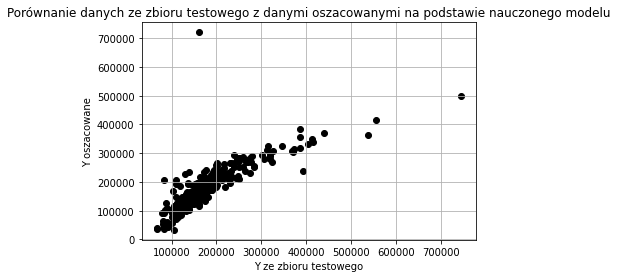

In [ ]:


plt.scatter(y_test, y_oszacowanie, color='black')
plt.title('Porównanie danych ze zbioru testowego z danymi oszacowanymi na podstawie nauczonego modelu')
plt.xlabel('Y ze zbioru testowego')
plt.ylabel('Y oszacowane')
plt.grid(True)

# Ewaluacja modelu
print("Błąd średniokwadratowy (RMSE) = %.4f" % np.sqrt(mean_squared_error(y_test, y_oszacowanie)))
print('R-squared = %.4f' % r2_score(y_test, y_oszacowanie))

In [ ]:
#Zadanko

#Sprawdz, czy jak sie zmienia wartosc Błędu średniokwadratowego(RMSE) i R-squared, jeśli zmienimy wartosc
#ratio_test na [0.5, 0.3, 0.1], wskaż na dla której wartości ratio, wyniki są najlepsze.
#użyj na pętli for

In [ ]:
for ratio in [0.5, 0.3, 0.1]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=ratio, 
                                                    random_state=0)
  regression = linear_model.LinearRegression() #stworzenie modelu liniowego
  regression.fit(X_train, y_train)
  y_oszacowanie = regression.predict(X_test)

  # Ewaluacja modelu
  print(f'test={ratio}, train{1-ratio}')
  print("Błąd średniokwadratowy (RMSE) = %.4f" % np.sqrt(mean_squared_error(y_test, y_oszacowanie)))
  print('R-squared = %.4f' % r2_score(y_test, y_oszacowanie))
  print("\n")




  

test=0.5, train0.5
Błąd średniokwadratowy (RMSE) = 44033.2912
R-squared = 0.6971


test=0.3, train0.7
Błąd średniokwadratowy (RMSE) = 44590.2860
R-squared = 0.7071


test=0.1, train0.9
Błąd średniokwadratowy (RMSE) = 36606.1998
R-squared = 0.8050




### Regularyzacja
wprowadzenie dodatkowej informacji do rozwiązywanego zagadnienia źle postawionego w celu polepszenia jakości rozwiązania. Bywają sytuację, gdzie poprawiają jakość generalizacji modelu.

### Regularyzjacja Tichonowa (ridge regression)


Regularyzacja Tichonowa jest w ogólności metodą regularyzacji zagadnień źle uwarunkowanych. W swoim pierwotnym założeniu polegała ona na dodaniu do źle uwarunkowanego problemu pewnego członu, zwanego członem regularyzacyjnym. Jego zadaniem jest zniwelowanie wpływu uwarunkowania na wynik (np. ograniczenie oscylacji w okolicach wyniku itp.).

Mając układ równań w postaci $Ax=b$, gdzie $A$ to macierz współczynników, $x$ to wektor niewiadomych, a $b$ to wektor rozwiązań, regularyzacja Tichonowa zakłada, że minimalizowana będzie wartość funkcjonału w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha x^Tx, $$

gdzie $\alpha$ to parametr regularyzacyjny, zwany również współczynnikiem tłumienia, a $x^Tx$ to kwadrat długości wektora $x$.

Wyznaczenie pochodnych cząstkowych funkcjonału $\Pi$ po wektorze niewiadomych i przyrównanie ich do zera prowadzi do minimalnego rozwiązania w postaci:

$$ x = [A^TA + \alpha I]x, $$

gdzie $I$ jest macierzą jednostkową. Dobór optymalnej wartości parametru regularyzacyjnego jest osobnym zagadnieniem (np. metoda L-curve).

Problem regularyzacji Tichonowa postawić można również w formaliźmie macierzowym, wykorzystując macierz regularyzacji. Minimalizowany jest wtedy funkcjonał $\Pi$ w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha[Rx]^T[Rx], $$

gdzie: $R$ jest rzeczoną macierzą regularyzacji.

Regularyzację Tichonowa wykorzystuje się w jednym z wariantów MLR, zwanym  regresją grzbietową (ang. ridge regression), minimalizując funkcję kosztu w postaci:

$$ L_r(y, f(X, w)) = \sum_{i=1}^N || y_i - X_iw - w_0||^2 + \alpha[||w||^2 + w_0^2], $$

gdzie $\alpha$ jest parametrem regularyzacynym. 


### Regresja lasso (ang. least absolute shrinkage and selection operator )

Metoda lasso (również Lasso, LASSO) wykorzystywana jest jako metoda regresji, która wykorzystuje zarówno selekcję cech jak i regularyzację w celach minimalizacji błędu przewidywania modelu statystycznego, który otrzymywany jest jako wynik działania metody.

W przypadku regresji, metoda lasso daje bardziej zwięzłe wyniki od regularyzacji Tichonowa i MLR - redukowany jest przez to wpływ przeszacowania modelu na ostateczny wynik dopasowania. Regresja lasso sprowadza się dominimalizacji funkcji kosztu w postaci:

$$ L_{lasso}(y, f(X, w)) = \sum_{i=1}^{N} || y_i - X_iw - w_0 ||^2 + \alpha [||w|| + |w_0|].$$ 

Poniżej przedstawiono prówanie wyników regresji lasso z poprzednio stosowanymi metodami:

In [ ]:
#sprawdzmy teraz czy te regularyzacje nam pomoga

In [ ]:
def show_results(model, X_train, X_test, y_train, y_test):
  print('rmse test ', np.sqrt(mse(model.predict(X_test), y_test)))
  print('mae test ',mae(model.predict(X_test), y_test))
  print('r2', r2_score(model.predict(X_test), y_test))

In [ ]:
#Sprawdzmy czy na naszych danych, czy jakakolwiek z regularyzacji poprawi jakość

lm = LinearRegression().fit(X_train, y_train)
print("Wyniki dla regresji liniowej bez regularyzacji")
show_results(lm, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej bez regularyzacji
rmse test  36606.199755349684
mae test  22378.015995136157
r2 0.6998085997432879


In [ ]:
for alfa in np.arange(0.01, 0.5, 0.01):
  

  print(f'alfa={alfa}')
  lm_ridge = Ridge(alpha=alfa)
  lm_ridge.fit(X_train, y_train)
  print("Wyniki dla regresji liniowej z regularyzacja grzbietowa")
  show_results(lm_ridge, X_train, X_test, y_train, y_test)
  print("\n")

alfa=0.01
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.17775633247
mae test  22377.984461827087
r2 0.6998086575987987


alfa=0.02
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.15575941377
mae test  22377.952928903014
r2 0.6998087154273653


alfa=0.03
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.133764593425
mae test  22377.92139636411
r2 0.6998087732289933


alfa=0.04
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.1117718713
mae test  22377.88986421037
r2 0.6998088310036839


alfa=0.05
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.089781247254
mae test  22377.858332441956
r2 0.6998088887514402


alfa=0.060000000000000005
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606.06779272119
mae test  22377.826801058865
r2 0.6998089464722634


alfa=0.06999999999999999
Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  36606

In [ ]:
lm_lasso = Lasso(alpha=1.0)
lm_lasso.fit(X_train, y_train)
print("Wyniki dla regresji liniowej z regularyzacja typu Lasso")
show_results(lm_lasso, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej z regularyzacja typu Lasso
rmse test  36606.31853304579
mae test  22377.959358854205
r2 0.6998065535648496


Ostanie z regresji liniowej

In [ ]:
### Walidacja krzyżowa

In [ ]:
# Walidacja krzyżowa jest techniką oceny modelu uczenia maszynowego i testowania jego wydajności.
# Głownie ma na cely wyelimowac zjawisko przeuczenia
# Istnieje wiele różnych technik, które mogą być użyte do walidacji krzyżowej modelu. Jednak wszystkie działają podobnie
# Podzielenie zbioru danych na typy: treningowy i testowy
# w zależności liczby kawałkow(fold), masz rózny podzial zbioru, tutaj cv=5
# ogolnie rzecz biorac, kazdy z foldow będzie kiedys foldem testowym, a pozostale treningowym
# zapobiegamy sytuacji, ze model nauczy sie idealnie relacji na konkretnym kawalku zbioru, jak przy zwyklym train_test_split
# a nie bedzie mial zdolnosci generalizacji na danych testowych

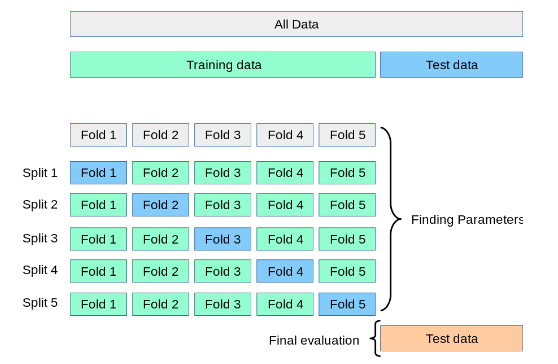

In [ ]:
df =data[[col for col in cols if col !="SalesPrice"]]

NameError: ignored

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import cross_validation


In [ ]:
#show metric for each fold in k fold cross validation
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report










In [ ]:
X;

In [ ]:
from sklearn.model_selection import KFold
list_df = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_adj = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    df = pd.DataFrame({'mse': [mse], 'rmse': [rmse], 'mae': [mae], 'r2': [r2], 'r2_adj': [r2_adj], 'mape': [mape]})
    list_df.append(df)



In [ ]:
df_kfold = pd.concat(list_df)
df_kfold

,mse,rmse,mae,r2,r2_adj,mape
0,1.576963e+09,39710.990354,25319.860444,0.794407,0.790079,15.286202
0,1.250899e+09,35368.052779,24154.176410,0.816024,0.812151,14.001846
0,2.958455e+09,54391.678838,28246.547590,0.464500,0.453227,17.467277
0,1.265423e+09,35572.791228,23895.417818,0.798471,0.794228,14.835491
0,9.652675e+08,31068.754116,22481.665019,0.815326,0.811438,13.401516


In [ ]:
df.mean().round(1)

mse       965267482.3
rmse          31068.8
mae           22481.7
r2                0.8
r2_adj            0.8
mape             13.4
dtype: float64

In [ ]:
lm_ridge_CV = RidgeCV().fit(X_train, y_train)
lm_lasso_CV = LassoCV().fit(X_train, y_train)

print("Wyniki dla regresji liniowej z regularyzacja grzbietowa")
show_results(lm_ridge_CV, X_train, X_test, y_train, y_test)

print("Wyniki dla regresji liniowej z regularyzacja typu Lasso i walidacja krzyzowa")
show_results(lm_lasso_CV, X_train, X_test, y_train, y_test)

In [ ]:
#sprawdz, czy ustawienie parametru cv=5 i cv=10, poprawia jakość generalizacji(RidgeCV, LassoCV), spojrz do dokumentacji sklearn, gdzie wstawic parametr cv
#nie zapomnij o tym, ze możesz uczyć model na całym zbiorze, a nie na tylko zbiorze treningowym

In [ ]:
for cv_param in [2, 3, 5, 10, 20]:
  pass
  #kod

In [ ]:
# #pozadane badz nie wartosci metryk w regresji


# MSE, RMSE, MAE ----> 0 to jest idealny wynik, im dalej(powyzej zera) tym gorzej, te metryki moga byc nieskonczenie duze(co za tym idzie, coraz gorsze rezulat)
# R, R_Adusted---> 1, -1 to jest idealny wynik(pelna korelacja), 0 - brak korelacji
# R2 ---> 1 - idealnie, 0-najgorzej, metryka ponizej zero ---> tzn badania relacja miedzy X a y nie jest liniowa, warto zmienic algorytm
# MAPE--> przyjmuje wartosci powyzej zera, to jest zmiana procentowa, wiec nie ma tu zlych czy dobrych dobrych wartosci, 